<a href="https://colab.research.google.com/github/mzaoualim/Coursera_IBM_Machine_Learning_Professional_Certificate/blob/main/Unsupervised_Machine_Learning/Unsupervised_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Module imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report

# Introduction

##Objective

This is the Project-course of Coursera's 'Unsupervised Machine Learning'.

With the aim to use multiple clustering algorithms to divide the observations into differents homogeneous clusters.

## Data Source

We'll be using the Wine quality data set, wich contrain as features the chemical propreties of observed red and white wine with corresponding quality metric.

The task is to try to isolate oberservations into homogenous sub groups according to there quality level, with the help of a set of unsupervised machine learning algorithms.

# EDA

In [2]:
#Load the Data
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/Wine_Quality_Data.csv'
data = pd.read_csv(data_url)

In [3]:
#Sneack peek
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
#Brief descriptive statistics
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
#Data shape
print('The data contains:\n', data.shape[0], ' lines.\n', data.shape[1], ' columns.\n')

The data contains:
 6497  lines.
 13  columns.



In [6]:
#Accounting for missing data
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

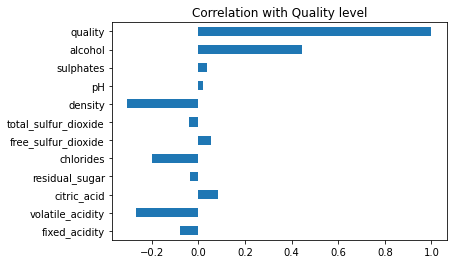

In [8]:
#Correlation with level of Quality
data.corrwith(data.quality).plot(kind='barh', title='Correlation with Quality level')

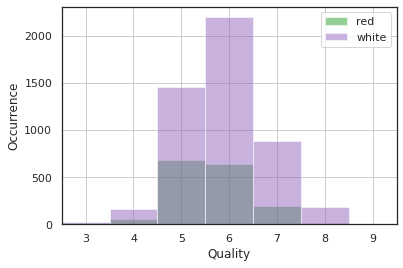

In [9]:
# seaborn styles
sns.set_context('notebook')
sns.set_style('white')

# custom colors
red = sns.color_palette()[2]
white = sns.color_palette()[4]

# set bins for histogram
bin_range = np.array([3, 4, 5, 6, 7, 8, 9])

# plot histogram of quality counts for red and white wines
ax = plt.axes()
for color, plot_color in zip(['red', 'white'], [red, white]):
    q_data = data.loc[data.color==color, 'quality']
    q_data.hist(bins=bin_range, 
                alpha=0.5, ax=ax, 
                color=plot_color, label=color)
    

ax.legend()
ax.set(xlabel='Quality', ylabel='Occurrence')

# force tick labels to be in middle of region
ax.set_xlim(3,10)
ax.set_xticks(bin_range+0.5)
ax.set_xticklabels(bin_range);
ax.grid('off')

In [10]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [11]:
for n in range(3, 10):
  print('Quality level', n, 'has ', len(data[data['quality'] == n]), 'observations.')

Quality level 3 has  30 observations.
Quality level 4 has  216 observations.
Quality level 5 has  2138 observations.
Quality level 6 has  2836 observations.
Quality level 7 has  1079 observations.
Quality level 8 has  193 observations.
Quality level 9 has  5 observations.


#Feature Engineering

## Normale distribution

In [12]:
#Checking for normal distributions

float_columns = [x for x in data.columns if x not in ['color', 'quality']]

skew_columns = (data[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

chlorides              5.399828
sulphates              1.797270
fixed_acidity          1.723290
volatile_acidity       1.495097
residual_sugar         1.435404
free_sulfur_dioxide    1.220066
dtype: float64

In [13]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    data[col] = np.log1p(data[col])

## Scaling

In [14]:
#Scaling distances between observations points
sc = StandardScaler()
data[float_columns] = sc.fit_transform(data[float_columns])

## Encoding Target Variable

In [15]:
le = LabelEncoder()

In [16]:
le.fit(data['quality'])

LabelEncoder()

In [17]:
data['quality'] = le.transform(data['quality'])

In [18]:
data['quality'].unique()

array([2, 3, 4, 1, 5, 0, 6])

## Encoding color feature

In [19]:
color = pd.get_dummies(data['color'],
               prefix= 'color')
color

,color_red,color_white
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
6492,0,1
6493,0,1
6494,0,1
6495,0,1


In [20]:
data['color_red'] = color['color_red']
data['color_white'] = color['color_white']

In [21]:
data.drop(columns='color', inplace = True)

In [22]:
data.columns.to_list()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'color_red',
 'color_white']

#Model Selection

## Model 1: K-means

In [23]:
train = data.loc[:, data.columns != 'quality']

In [24]:
km = KMeans(n_clusters=7, random_state=42)
km = km.fit(train)

data['kmeans'] = km.predict(train)

## Model 2: Hierarchical Agglomerative Clustering

In [25]:
ag = AgglomerativeClustering(n_clusters=7, linkage='ward', compute_full_tree=True)
ag = ag.fit(train)
data['agglom'] = ag.fit_predict(train)

## Model 3: DBSCAN

DBSCAN: density-based spatial clustering of applications with noise

In [26]:
db = DBSCAN(eps=.5, min_samples=5).fit(train)

In [27]:
db.labels_

array([-1, -1, -1, ..., -1, -1, -1])

#Data Analytics

In [28]:
#K-mean prediction assessment
y_pred = data['kmeans']
y_true = data['quality']
print(classification_report(y_true, y_pred, labels=[0,1,2,3,4,5,6]))

              precision    recall  f1-score   support

           0       0.00      0.07      0.01        30
           1       0.06      0.29      0.09       216
           2       0.05      0.02      0.03      2138
           3       0.44      0.02      0.03      2836
           4       0.21      0.20      0.21      1079
           5       0.00      0.01      0.00       193
           6       0.00      0.20      0.00         5

    accuracy                           0.06      6497
   macro avg       0.11      0.12      0.05      6497
weighted avg       0.24      0.06      0.06      6497



In [29]:
# HAC prediction assessment

y_pred = data['agglom']
y_true = data['quality']
print(classification_report(y_true, y_pred, labels=[0,1,2,3,4,5,6]))

              precision    recall  f1-score   support

           0       0.01      0.03      0.01        30
           1       0.03      0.19      0.05       216
           2       0.27      0.13      0.17      2138
           3       0.38      0.13      0.19      2836
           4       0.25      0.14      0.18      1079
           5       0.09      0.44      0.14       193
           6       0.00      0.20      0.00         5

    accuracy                           0.14      6497
   macro avg       0.15      0.18      0.11      6497
weighted avg       0.30      0.14      0.18      6497



In [30]:
# DBSCAN assessment scan

labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 46
Estimated number of noise points: 6196


#Conclusion

The clear and obvious conlusion is the enablity to creat distinct (Unsupervised) cluster based on the quality level, wich refers to the some of the following problems:

- The need for more observations &/or features.
- The problem can be solved by a multi-class regression analysis.
- Or there is no relationship between collected data and the target variable.